In [1]:
#import packages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def parse_row(row):
    row = row.split(".")[0]
    return row

def to_hyperthyroid(row):
    if row != "negative":
        row = "hyperthyroid"
    return row

def to_hypothyroid(row):
    if row != "negative":
        row = "hypothyroid"
    return row



In [3]:
columns = ['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'category']

In [4]:
hyper_data = pd.read_csv("allhyper.csv", names=columns)
hypo_data = pd.read_csv("allhypo.csv", names=columns)
sick_data = pd.read_csv("sick.csv", names=columns)

In [5]:
hyper_data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'category'],
      dtype='object')

In [6]:
hyper_data['category'] = hyper_data['category'] \
                            .apply(parse_row) \
                            .apply(to_hyperthyroid)

hypo_data['category'] = hypo_data['category'] \
                            .apply(parse_row) \
                            .apply(to_hypothyroid)

sick_data['category'] = sick_data['category'] \
                            .apply(parse_row)

In [7]:
thyroid_frames = [hyper_data, hypo_data, sick_data]
thyroid_data = pd.concat(thyroid_frames) \
                 .drop_duplicates() \
                 .drop(['TBG', 'TBG measured'], axis=1)

In [8]:
thyroid_data.shape

(3221, 28)

In [9]:
thyroid_data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
referral source              0
category                     0
dtype: int64

<AxesSubplot:>

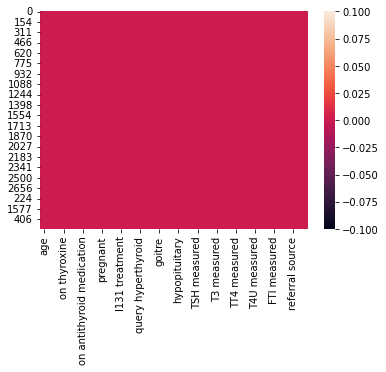

In [10]:
sns.heatmap(thyroid_data.isnull())

In [11]:
print("Number of samples:", len(thyroid_data))

Number of samples: 3221


In [12]:
thyroid_data.head(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,category
0,41,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125,t,1.14,t,109,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,2,t,102,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,f,?,t,109,t,0.91,t,120,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61,t,0.87,t,70,SVI,negative


In [13]:
thyroid_data.TSH.describe()

count     3221
unique     264
top          ?
freq       247
Name: TSH, dtype: object

In [14]:
thyroid_data['referral source'].value_counts()

other    1795
SVI       994
SVHC      289
STMW      106
SVHD       37
Name: referral source, dtype: int64

In [15]:
thyroid_data['category'].value_counts()

negative        2753
hypothyroid      220
sick             171
hyperthyroid      77
Name: category, dtype: int64

In [16]:
thyroid_data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,category
count,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221,...,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221
unique,94,3,2,2,2,2,2,2,2,2,...,2,65,2,218,2,139,2,210,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,t,?,other,negative
freq,91,2108,2878,3173,3186,3080,3175,3180,3165,3010,...,2632,589,3079,142,2945,276,2947,274,1795,2753


In [17]:
#replace the '?' values with numpy nan
for column in thyroid_data.columns:
    count=thyroid_data[column][thyroid_data[column]=='?'].count()
    if count != 0:
        print(column,thyroid_data[column][thyroid_data[column]=='?'].count())

age 1
sex 127
TSH 247
T3 589
TT4 142
T4U 276
FTI 274


In [18]:
for column in thyroid_data.columns:
    count=thyroid_data[column][thyroid_data[column]== '?'].count()
    if count!=0:
        thyroid_data[column]=thyroid_data[column].replace('?',np.nan)

In [19]:
for column in thyroid_data.columns:
    count=thyroid_data[column][thyroid_data[column]=='?'].count()
    if count == 0:
        print(column,thyroid_data[column][thyroid_data[column]=='?'].count())

age 0
sex 0
on thyroxine 0
query on thyroxine 0
on antithyroid medication 0
sick 0
pregnant 0
thyroid surgery 0
I131 treatment 0
query hypothyroid 0
query hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH measured 0
TSH 0
T3 measured 0
T3 0
TT4 measured 0
TT4 0
T4U measured 0
T4U 0
FTI measured 0
FTI 0
referral source 0
category 0


In [20]:
##  Unique Values
for column in thyroid_data.columns:
    print(column,(thyroid_data[column].unique()))

age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
sex ['F' 'M' nan]
on thyroxine ['f' 't']
query on thyroxine ['f' 't']
on antithyroid medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid surgery ['f' 't']
I131 treatment ['f' 't']
query hypothyroid ['f' 't']
query hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f' 't']
psych ['f' 't']
TSH measured ['t' 'f']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' 

In [21]:
thyroid_data['age'].fillna((thyroid_data['age'].median()), inplace = True)
thyroid_data['TSH'].fillna((thyroid_data['TSH'].median()), inplace = True)
thyroid_data['T3'].fillna((thyroid_data['T3'].median()), inplace = True)
thyroid_data['TT4'].fillna((thyroid_data['TT4'].median()), inplace = True)
thyroid_data['T4U'].fillna((thyroid_data['T4U'].median()), inplace = True)
thyroid_data['FTI'].fillna((thyroid_data['FTI'].median()), inplace = True)

In [22]:
## Impute nan value of sex column
thyroid_data['sex_Var']=np.where(thyroid_data['sex'].isnull(),1,0)
frequent=thyroid_data['sex'].mode()[0]
thyroid_data['sex'].fillna(frequent,inplace=True)

In [23]:
thyroid_data.drop(['sex_Var'],axis=1,inplace=True)

In [24]:
##  Unique Values
for column in thyroid_data.columns:
    print(column,(thyroid_data[column].unique()))

age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' 55.0 '93' '92']
sex ['F' 'M']
on thyroxine ['f' 't']
query on thyroxine ['f' 't']
on antithyroid medication ['f' 't']
sick ['f' 't']
pregnant ['f' 't']
thyroid surgery ['f' 't']
I131 treatment ['f' 't']
query hypothyroid ['f' 't']
query hyperthyroid ['f' 't']
lithium ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
hypopituitary ['f' 't']
psych ['f' 't']
TSH measured ['t' 'f']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' 1.5 '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.

In [25]:
# A quick fix needed
thyroid_data.loc[thyroid_data['age'] == '455', 'age'] = '45'

In [26]:
thyroid_data.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
referral source              object
category                    

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
thyroid_data['age']=pd.to_numeric(thyroid_data["age"])

In [29]:
thyroid_data['sex'] = le.fit_transform(thyroid_data["sex"])

In [30]:
thyroid_data['on thyroxine'] = le.fit_transform(thyroid_data["on thyroxine"])

In [31]:
thyroid_data['query on thyroxine'] = le.fit_transform(thyroid_data["query on thyroxine"])

In [32]:
thyroid_data['on antithyroid medication'] = le.fit_transform(thyroid_data["on antithyroid medication"])

In [33]:
thyroid_data['sick'] = le.fit_transform(thyroid_data["sick"])

In [34]:
thyroid_data['pregnant'] = le.fit_transform(thyroid_data["pregnant"])

In [35]:
thyroid_data['thyroid surgery'] = le.fit_transform(thyroid_data["thyroid surgery"])

In [36]:
thyroid_data['I131 treatment'] = le.fit_transform(thyroid_data["I131 treatment"])

In [37]:
thyroid_data['query hypothyroid'] = le.fit_transform(thyroid_data["query hypothyroid"])

In [38]:
thyroid_data['query hyperthyroid'] = le.fit_transform(thyroid_data["query hyperthyroid"])

In [39]:
thyroid_data['lithium'] = le.fit_transform(thyroid_data["lithium"])

In [40]:
thyroid_data['goitre'] = le.fit_transform(thyroid_data["goitre"])

In [41]:
thyroid_data['tumor'] = le.fit_transform(thyroid_data["tumor"])

In [42]:
thyroid_data['hypopituitary'] = le.fit_transform(thyroid_data["hypopituitary"])

In [43]:
thyroid_data['psych'] = le.fit_transform(thyroid_data["psych"])

In [44]:
thyroid_data['TSH measured'] = le.fit_transform(thyroid_data["TSH measured"])

In [45]:
thyroid_data['TSH'] = pd.to_numeric(thyroid_data["TSH"])

In [46]:
thyroid_data['T3 measured'] = le.fit_transform(thyroid_data["T3 measured"])

In [47]:
thyroid_data['T3'] = pd.to_numeric(thyroid_data["T3"])

In [48]:
thyroid_data['TT4 measured'] = le.fit_transform(thyroid_data["TT4 measured"])

In [49]:
thyroid_data['TT4'] = pd.to_numeric(thyroid_data["TT4"])

In [50]:
thyroid_data['T4U measured'] = le.fit_transform(thyroid_data["T4U measured"])

In [51]:
thyroid_data['T4U'] = pd.to_numeric(thyroid_data["T4U"])

In [52]:
thyroid_data['FTI measured'] = le.fit_transform(thyroid_data["FTI measured"])

In [53]:
thyroid_data['FTI'] = pd.to_numeric(thyroid_data["FTI"])

In [54]:
thyroid_data['referral source'] = le.fit_transform(thyroid_data["referral source"])

In [55]:
thyroid_data['category'] = le.fit_transform(thyroid_data["category"])

In [56]:
thyroid_data.dtypes

age                          float64
sex                            int32
on thyroxine                   int32
query on thyroxine             int32
on antithyroid medication      int32
sick                           int32
pregnant                       int32
thyroid surgery                int32
I131 treatment                 int32
query hypothyroid              int32
query hyperthyroid             int32
lithium                        int32
goitre                         int32
tumor                          int32
hypopituitary                  int32
psych                          int32
TSH measured                   int32
TSH                          float64
T3 measured                    int32
T3                           float64
TT4 measured                   int32
TT4                          float64
T4U measured                   int32
T4U                          float64
FTI measured                   int32
FTI                          float64
referral source                int32
c

<AxesSubplot:>

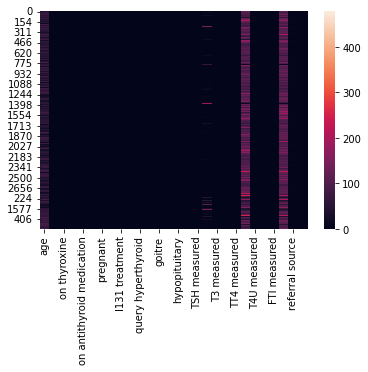

In [57]:
sns.heatmap(thyroid_data)

In [58]:
thyroid_data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,category
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,...,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,52.406085,0.306116,0.106489,0.014902,0.010866,0.043775,0.014281,0.012729,0.017386,0.065508,...,0.817138,1.951770,0.955914,107.551630,0.914312,0.988229,0.914933,110.261347,3.267619,1.936976
std,19.104151,0.460950,0.308510,0.121180,0.103689,0.204626,0.118666,0.112120,0.130725,0.247458,...,0.386614,0.839899,0.205317,38.091518,0.279946,0.185982,0.279024,35.967317,1.073584,0.461636
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.050000,0.000000,2.000000,0.000000,0.310000,0.000000,2.000000,0.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.600000,1.000000,86.000000,1.000000,0.880000,1.000000,93.000000,3.000000,2.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.900000,1.000000,102.000000,1.000000,0.970000,1.000000,106.000000,4.000000,2.000000
75%,68.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.200000,1.000000,123.000000,1.000000,1.070000,1.000000,123.000000,4.000000,2.000000
max,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,10.600000,1.000000,430.000000,1.000000,2.120000,1.000000,395.000000,4.000000,3.000000


In [59]:
thyroid_data.TSH.describe()

count    3221.000000
mean        6.322330
std        26.543102
min         0.005000
25%         0.580000
50%         1.500000
75%         3.000000
max       478.000000
Name: TSH, dtype: float64

In [60]:
thyroid_data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,category
0,41.0,0,0,0,0,0,0,0,0,0,...,1,2.5,1,125.0,1,1.14,1,109.0,1,2
1,23.0,0,0,0,0,0,0,0,0,0,...,1,2.0,1,102.0,0,0.97,0,106.0,4,2
2,46.0,1,0,0,0,0,0,0,0,0,...,0,1.9,1,109.0,1,0.91,1,120.0,4,2
3,70.0,0,1,0,0,0,0,0,0,0,...,1,1.9,1,175.0,0,0.97,0,106.0,4,2
4,70.0,0,0,0,0,0,0,0,0,0,...,1,1.2,1,61.0,1,0.87,1,70.0,3,2


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'on thyroxine'}>,
        <AxesSubplot:title={'center':'query on thyroxine'}>,
        <AxesSubplot:title={'center':'on antithyroid medication'}>],
       [<AxesSubplot:title={'center':'sick'}>,
        <AxesSubplot:title={'center':'pregnant'}>,
        <AxesSubplot:title={'center':'thyroid surgery'}>,
        <AxesSubplot:title={'center':'I131 treatment'}>,
        <AxesSubplot:title={'center':'query hypothyroid'}>],
       [<AxesSubplot:title={'center':'query hyperthyroid'}>,
        <AxesSubplot:title={'center':'lithium'}>,
        <AxesSubplot:title={'center':'goitre'}>,
        <AxesSubplot:title={'center':'tumor'}>,
        <AxesSubplot:title={'center':'hypopituitary'}>],
       [<AxesSubplot:title={'center':'psych'}>,
        <AxesSubplot:title={'center':'TSH measured'}>,
        <AxesSubplot:title={'center':'TSH'}>,
        <AxesSubplot:title={'center

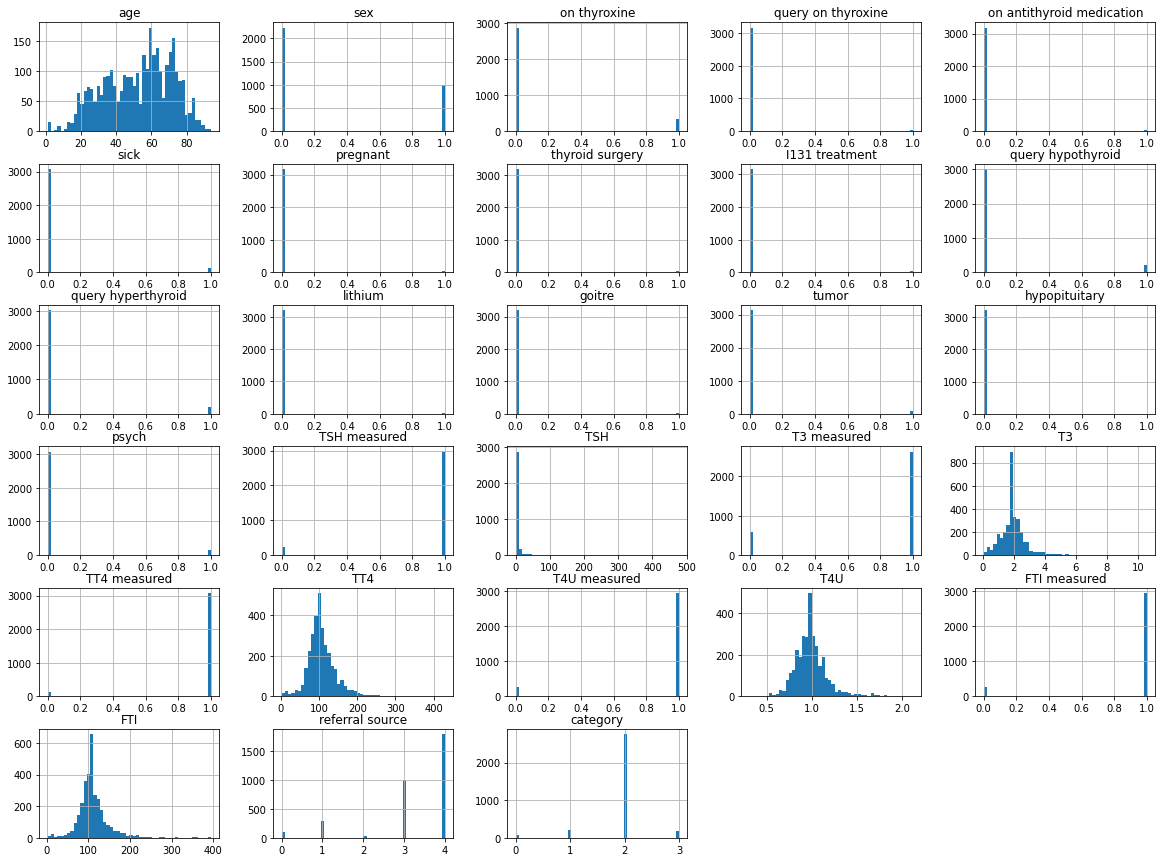

In [61]:
thyroid_data.hist(bins=50,figsize=(20,15))

<AxesSubplot:xlabel='TSH', ylabel='T3'>

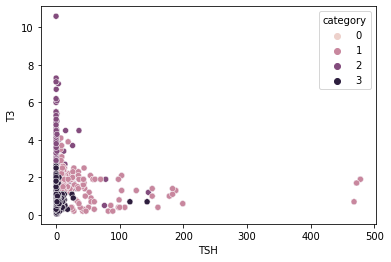

In [62]:
sns.scatterplot(x="TSH", y="T3", hue = 'category',  data=thyroid_data)

<AxesSubplot:xlabel='TSH', ylabel='T4U'>

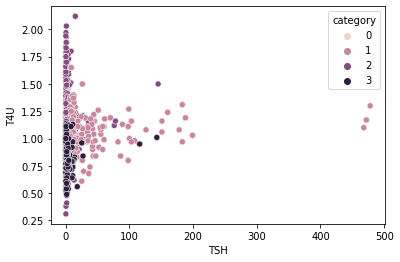

In [63]:
sns.scatterplot(x="TSH", y="T4U", hue = 'category',  data=thyroid_data)

<AxesSubplot:>

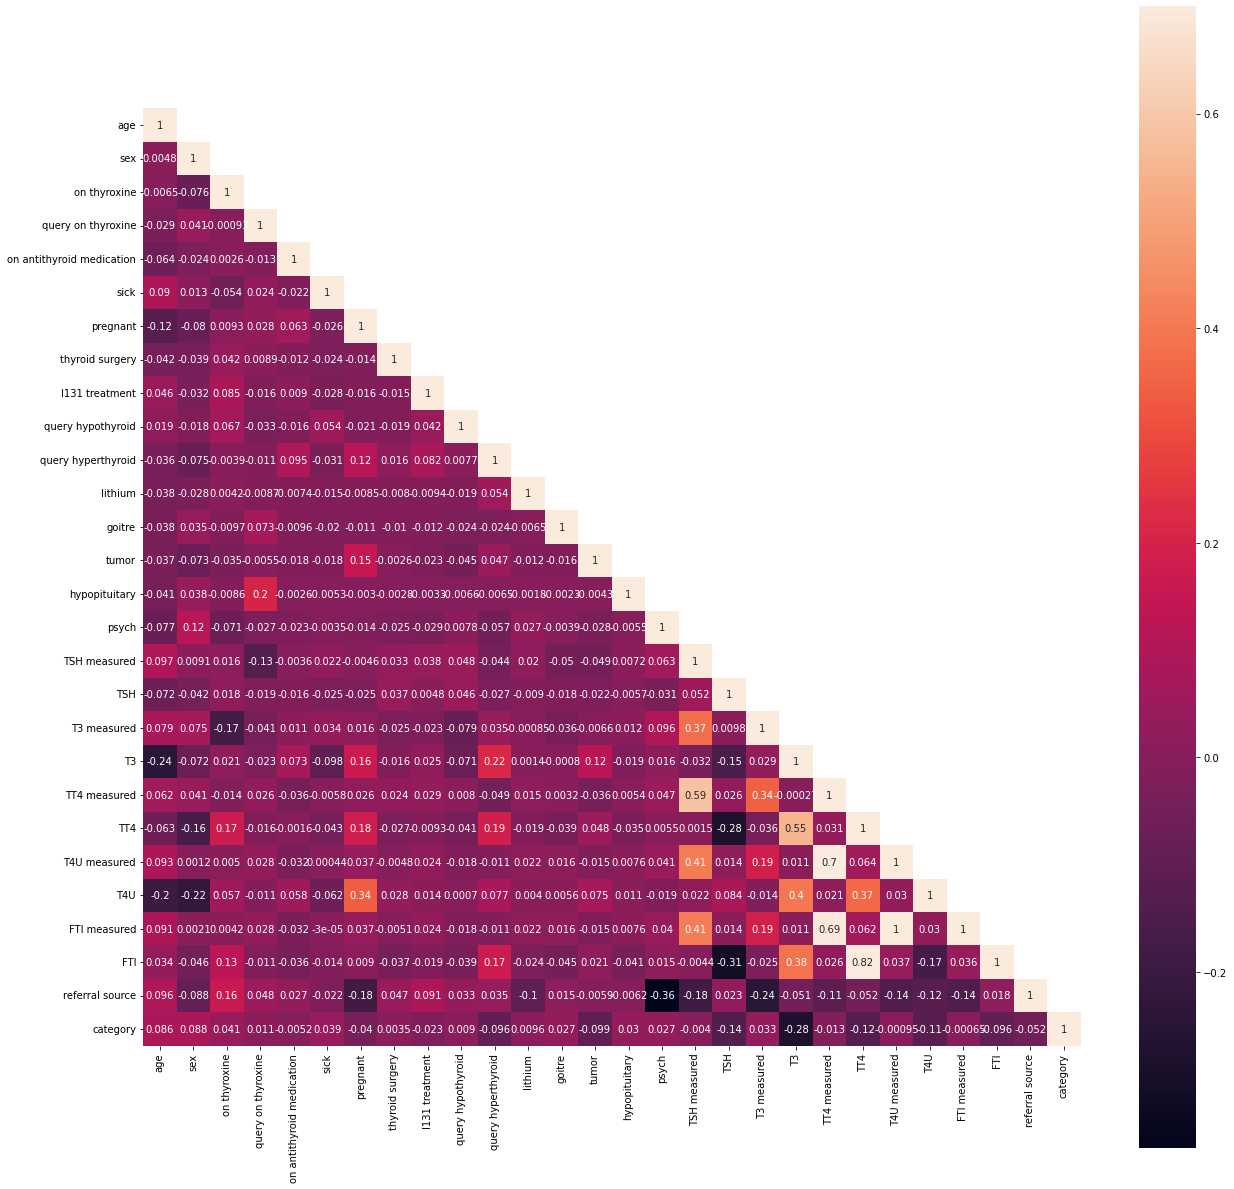

In [131]:
correlation_map = thyroid_data.corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(21,21)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

In [65]:
x = thyroid_data.drop("category",axis=1)
y = thyroid_data["category"]

<AxesSubplot:xlabel='category', ylabel='count'>

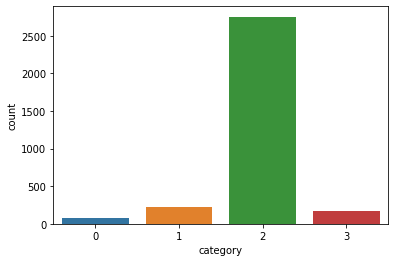

In [66]:
sns.countplot(thyroid_data['category'])

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'referral source'],
      dtype='object')

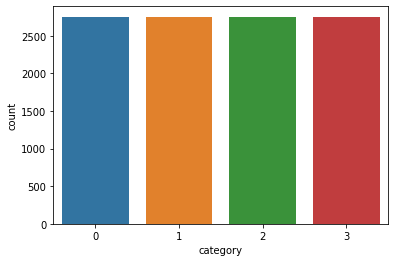

In [67]:
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE


rdsmple=RandomOverSampler()
x_sampled,y_sampled=rdsmple.fit_resample(x,y)

x_sampled.shape


x_sampled=pd.DataFrame(data=x_sampled,columns=x.columns)


x_sampled


sns.countplot(y_sampled)


x_sampled.columns

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_sampled, y_sampled, test_size=0.30, random_state=0)
x_train.shape,x_test.shape

((7708, 27), (3304, 27))

In [69]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)
y_pred=dt.predict(x_test)
dt.score(x_test,y_test)

0.8940677966101694

In [70]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9098062953995157

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=10)
gb.fit(x_train,y_train)
gb.score(x_test,y_test)

0.8907384987893463

In [72]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(x_train,y_train)
nb_clf.score(x_test,y_test)

0.6216707021791767

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8429176755447942

In [74]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7254842615012107

In [75]:
from sklearn.svm import SVC
sv= SVC(probability=True)
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

0.7415254237288136

# Feature Importance

In [76]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

In [77]:
print(model.feature_importances_)

[0.05688373 0.02164548 0.02229945 0.00436378 0.00285609 0.00694246
 0.00766889 0.00184021 0.00389374 0.01310464 0.02763748 0.00093444
 0.00179055 0.01881808 0.00045271 0.00499428 0.01464931 0.17058804
 0.01885778 0.18303473 0.00246444 0.12290419 0.00749956 0.06331256
 0.00622481 0.1530243  0.0613143 ]


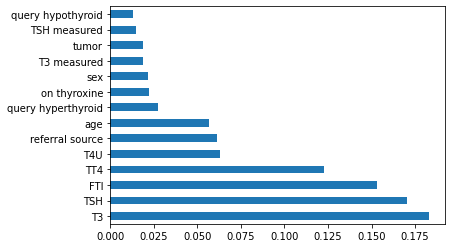

In [78]:
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

In [79]:
col_to_drop=["query on thyroxine","on antithyroid medication","sick","pregnant","thyroid surgery","I131 treatment","lithium","goitre","hypopituitary","psych","TT4 measured","T4U measured","FTI measured"]

In [80]:
x_train=x_train.drop(col_to_drop,axis=1)
x_test=x_test.drop(col_to_drop,axis=1)

In [81]:
x_train.head()

,age,sex,on thyroxine,query hypothyroid,query hyperthyroid,tumor,TSH measured,TSH,T3 measured,T3,TT4,T4U,FTI,referral source
3424,37.0,1,0,0,0,0,0,1.500,1,4.3,187.0,0.96,194.0,4
463,73.0,0,0,0,0,1,1,0.005,1,3.6,119.0,0.90,133.0,4
1722,35.0,0,0,0,0,0,1,0.150,1,5.1,167.0,1.00,168.0,4
6155,62.0,1,0,1,0,0,1,13.000,1,0.8,83.0,0.81,103.0,1
6030,74.0,0,0,0,0,0,1,6.900,0,1.9,97.0,0.87,112.0,4


In [82]:
x_train.shape,x_test.shape

((7708, 14), (3304, 14))

# Decision tree Classifer

In [83]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)
y_pred=dt.predict(x_test)
dt.score(x_test,y_test)

0.8934624697336562

In [84]:
y_pred=dt.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[847,   0,   0,  14],
       [  0, 735,   9,  82],
       [ 46,  60, 628,  62],
       [ 79,   0,   0, 742]], dtype=int64)

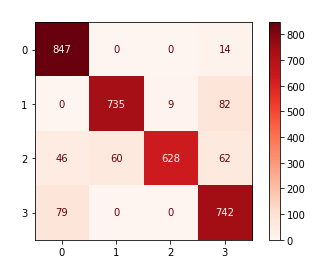

In [85]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(dt,x_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       861
           1       0.92      0.89      0.91       826
           2       0.99      0.79      0.88       796
           3       0.82      0.90      0.86       821

    accuracy                           0.89      3304
   macro avg       0.90      0.89      0.89      3304
weighted avg       0.90      0.89      0.89      3304



# Random Forest Classifer

In [87]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9092009685230025

In [88]:
y_pred=rf.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[861,   0,   0,   0],
       [  0, 767,   0,  59],
       [ 25,  61, 658,  52],
       [ 79,  24,   0, 718]], dtype=int64)

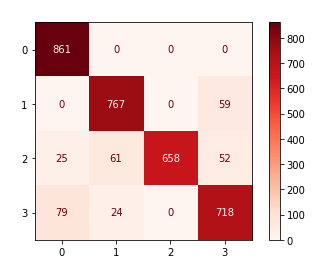

In [89]:
matrix = plot_confusion_matrix(rf,x_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       861
           1       0.90      0.93      0.91       826
           2       1.00      0.83      0.91       796
           3       0.87      0.87      0.87       821

    accuracy                           0.91      3304
   macro avg       0.91      0.91      0.91      3304
weighted avg       0.91      0.91      0.91      3304



# Gradient Boosting Classifier

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=10)
gb.fit(x_train,y_train)
gb.score(x_test,y_test)

0.8904358353510896

In [92]:
y_pred=gb.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[861,   0,   0,   0],
       [  0, 740,   9,  77],
       [ 51,  71, 616,  58],
       [ 79,  13,   4, 725]], dtype=int64)

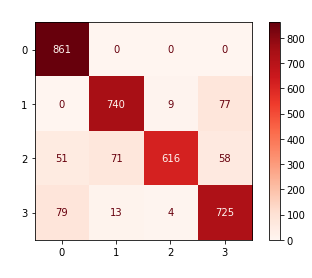

In [93]:
matrix = plot_confusion_matrix(gb,x_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       861
           1       0.90      0.90      0.90       826
           2       0.98      0.77      0.86       796
           3       0.84      0.88      0.86       821

    accuracy                           0.89      3304
   macro avg       0.90      0.89      0.89      3304
weighted avg       0.90      0.89      0.89      3304



# Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(x_train,y_train)
nb_clf.score(x_test,y_test)

0.6888619854721549

In [96]:
y_pred=nb_clf.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[804,  27,  16,  14],
       [  0, 705,  15, 106],
       [ 86, 419, 149, 142],
       [ 79,  93,  31, 618]], dtype=int64)

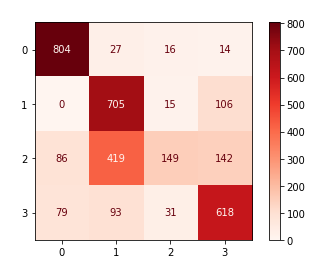

In [97]:
matrix = plot_confusion_matrix(nb_clf,x_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       861
           1       0.57      0.85      0.68       826
           2       0.71      0.19      0.30       796
           3       0.70      0.75      0.73       821

    accuracy                           0.69      3304
   macro avg       0.70      0.68      0.65      3304
weighted avg       0.70      0.69      0.65      3304



# K-Nearest Neighbor

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.850181598062954

In [100]:
y_pred=knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[779,   0,   8,  74],
       [  0, 750,  36,  40],
       [ 28,  71, 618,  79],
       [ 44,  52,  63, 662]], dtype=int64)

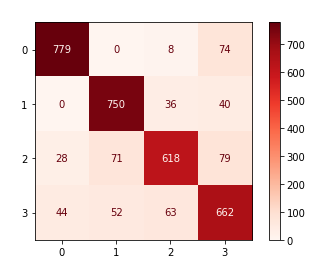

In [101]:
matrix = plot_confusion_matrix(knn,x_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       861
           1       0.86      0.91      0.88       826
           2       0.85      0.78      0.81       796
           3       0.77      0.81      0.79       821

    accuracy                           0.85      3304
   macro avg       0.85      0.85      0.85      3304
weighted avg       0.85      0.85      0.85      3304



# Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7276029055690073

In [104]:
y_pred_lr=lr.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[779,   0,   8,  74],
       [  0, 750,  36,  40],
       [ 28,  71, 618,  79],
       [ 44,  52,  63, 662]], dtype=int64)

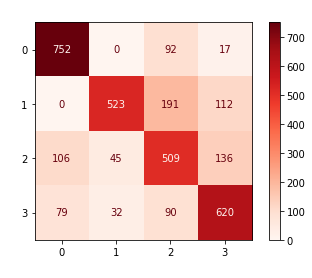

In [105]:
matrix = plot_confusion_matrix(lr,x_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       861
           1       0.86      0.91      0.88       826
           2       0.85      0.78      0.81       796
           3       0.77      0.81      0.79       821

    accuracy                           0.85      3304
   macro avg       0.85      0.85      0.85      3304
weighted avg       0.85      0.85      0.85      3304



# Support Vector Machine

In [107]:
from sklearn.svm import SVC
sv= SVC(probability=True)
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

0.7475786924939467

In [108]:
y_pred=sv.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[683,   0, 152,  26],
       [  0, 701,  29,  96],
       [ 56,  63, 503, 174],
       [ 79,  61,  98, 583]], dtype=int64)

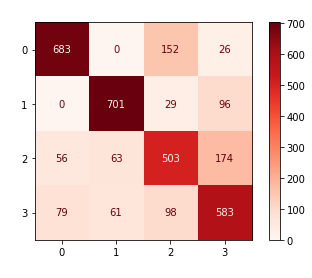

In [109]:
matrix = plot_confusion_matrix(sv,x_test,y_test,cmap=plt.cm.Reds)
matrix.ax_.set_title('confusion Matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.show()

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       861
           1       0.85      0.85      0.85       826
           2       0.64      0.63      0.64       796
           3       0.66      0.71      0.69       821

    accuracy                           0.75      3304
   macro avg       0.75      0.75      0.75      3304
weighted avg       0.75      0.75      0.75      3304



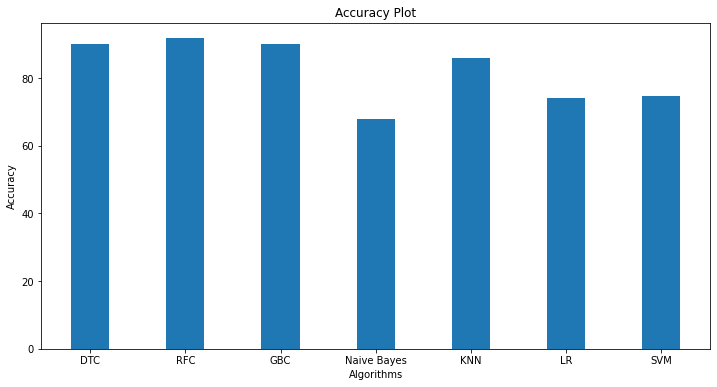

In [128]:
w=0.2
x= ["DTC","RFC","GBC","Naive Bayes","KNN","LR","SVM"]
Accuracy=[90,91.79,90,68,86,74,74.7]
plt.figure(figsize=(12,6))
bar1=np.arange(len(x))
plt.bar(bar1,Accuracy,0.4,label="Accuracy")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Plot")
plt.xticks(bar1,x)
plt.show()

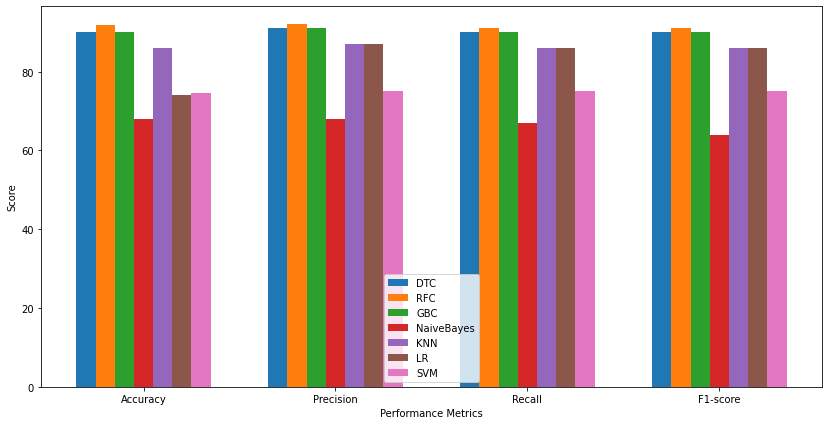

In [124]:
w=0.1
x=["Accuracy","Precision","Recall","F1-score"]
DTC=[90,91,90,90]
RFC=[91.79,92,91,91]
GBC=[90,91,90,90]
NaiveBayes=[68,68,67,64]
KNN=[86,87,86,86]
LR=[74,87,86,86]
SVM=[74.7,75,75,75]

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]
bar4=[i+w for i in bar3]
bar5=[i+w for i in bar4]
bar6=[i+w for i in bar5]
bar7=[i+w for i in bar6]
plt.figure(figsize=(14,7))
plt.bar(bar1,DTC,w,label="DTC")
plt.bar(bar2,RFC,w,label="RFC")
plt.bar(bar3,GBC,w,label="GBC")
plt.bar(bar4,NaiveBayes,w,label="NaiveBayes")
plt.bar(bar5,KNN,w,label="KNN")
plt.bar(bar6,LR,w,label="LR")
plt.bar(bar7,SVM,w,label="SVM")

plt.xlabel("Performance Metrics")
plt.ylabel("Score")
plt.xticks(bar4,x)
plt.legend()
plt.show()

# Prediction Probabilities

In [ ]:
r_probs=[0 for _ in range(len(y_test))]
dt_probs=dt.predict_proba(x_test)
rf_probs=rf.predict_proba(x_test)
gb_probs=gb.predict_proba(x_test)
nb_probs=nb_clf.predict_proba(x_test)
knn_probs=knn.predict_proba(x_test)
lr_probs=lr.predict_proba(x_test)
sv_probs=sv.predict_proba(x_test)

In [ ]:
dt_probs=dt_probs[:,1]
rf_probs=rf_probs[:,1]
gb_probs=gb_probs[:,1]
nb_probs=nb_probs[:,1]
knn_probs=knn_probs[:,1]
lr_probs=lr_probs[:,1]
sv_probs=sv_probs[:,1]

In [ ]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
print("Prediction Probabilities for Logistic Regression") 
print(pred_prob1)
input("Waiting....")
print("Prediction Probabilities for KNN") 
print(pred_prob2)
input("Waiting....")

In [ ]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, thresh = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
#fpr, tpr on different threshold value for our models
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, dt_probs[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, rf_probs[:,1], pos_label=1)
print("FPR1 : ",fpr1," TPR1 : ",tpr1," Threshold 1 : ",thresh1)
print("FPR2 : ",fpr2," TPR2 : ",tpr2," Threshold 2 : ",thresh2)
print("FPR Random : ",p_fpr," TPR Random : ",p_tpr," Threshold  : ",thresh)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test, r_probs,multi_class="ovr",average=None)
dt_auc = roc_auc_score(y_test, dt_probs,multi_class="ovr",average=None)